In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
import warnings 
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
data=pd.read_csv(r"D:\archive (7)\train.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]=data[['blue','dual_sim','four_g','three_g','touch_screen','wifi']].astype(object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [9]:
(data.isna().mean()*100)

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [10]:
df_test=pd.read_csv(r"D:\archive (7)\test.csv")

In [11]:
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [12]:
df_test.duplicated().sum()

0

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [14]:
(df_test.isna().mean()*100)

id               0.0
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64

In [15]:
finall_df = data.append(df_test)
finall_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,997.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,998.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


<AxesSubplot:>

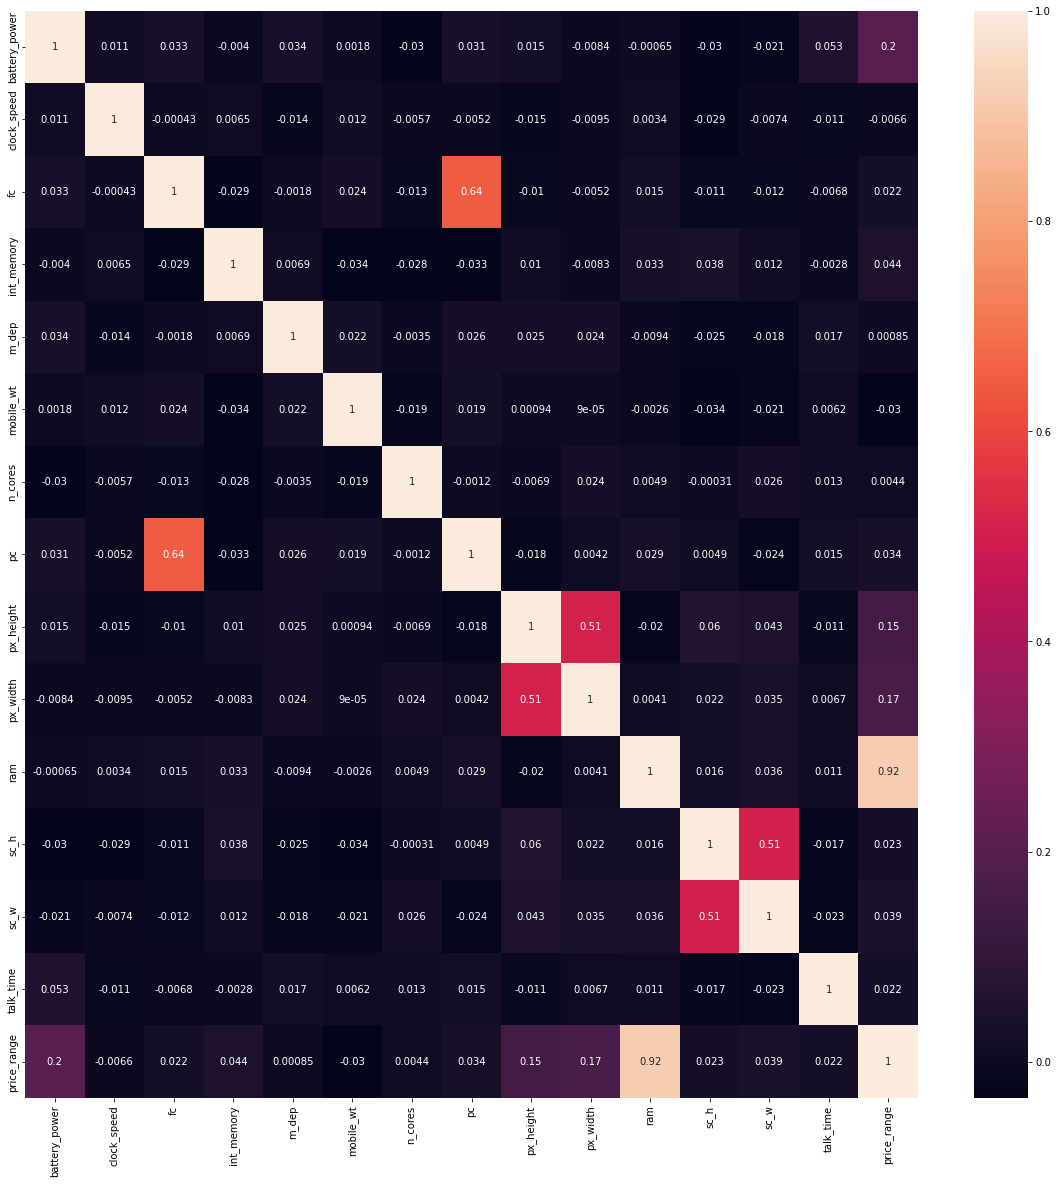

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [17]:
f_v=data[data.columns[:-1]]
c_l=data[[data.columns[-1]]]

In [18]:
c_l.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [19]:
f_v.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


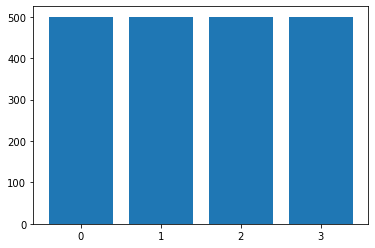

In [20]:
plt.bar(c_l["price_range"].unique(),c_l.value_counts().values)
plt.xticks(c_l["price_range"].unique())
plt.show()

In [21]:
c_l.value_counts()

price_range
0              500
1              500
2              500
3              500
dtype: int64

<AxesSubplot:>

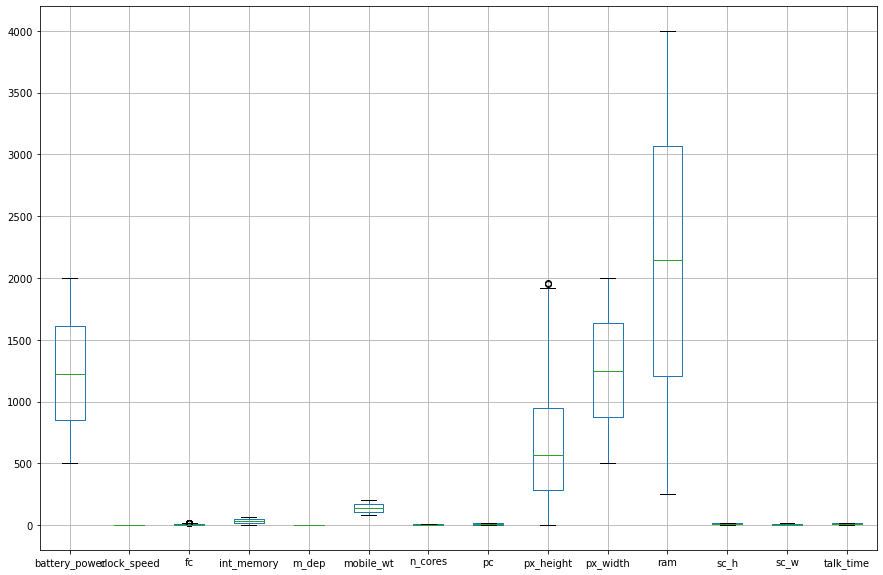

In [22]:
c=[]
l=[]
for y in f_v.columns:
    if f_v[y].dtype!="O":
        c.append(y)
    else:
        l.append(y)
plt.figure(figsize=(15,10))
f_v[c].boxplot()

In [23]:
x_train,x_test,y_train,y_test=train_test_split(f_v,c_l,train_size=0.8,stratify=c_l,random_state=1)

In [24]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1302,1928,0,2.6,0,5,0,5,0.8,162,5,16,229,1004,696,14,12,15,1,1,1
146,1101,0,1.8,0,0,0,31,0.2,148,2,7,387,1269,2196,12,6,19,0,1,1
1130,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1485,742,1,2.3,0,0,0,21,0.7,104,8,1,875,925,331,11,8,7,1,0,0
1905,1027,1,0.8,0,7,0,18,1.0,146,7,11,338,534,1234,7,4,14,1,0,1


In [25]:
x_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [26]:
ohe=OneHotEncoder()

In [27]:
x_train=x_train.reset_index(drop=True)

In [28]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1928,0,2.6,0,5,0,5,0.8,162,5,16,229,1004,696,14,12,15,1,1,1
1,1101,0,1.8,0,0,0,31,0.2,148,2,7,387,1269,2196,12,6,19,0,1,1
2,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
3,742,1,2.3,0,0,0,21,0.7,104,8,1,875,925,331,11,8,7,1,0,0
4,1027,1,0.8,0,7,0,18,1.0,146,7,11,338,534,1234,7,4,14,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,989,1,1.8,1,4,1,55,0.7,124,1,12,46,1069,1737,8,5,10,1,0,1
1596,1890,0,1.1,0,4,1,48,0.5,127,4,5,1438,1832,2392,10,4,15,1,0,1
1597,1745,0,2.9,0,0,1,3,0.9,105,3,0,426,1629,1308,5,0,2,1,1,0
1598,1197,0,1.3,0,3,1,20,0.5,149,6,7,649,1629,1797,19,5,4,1,1,1


In [29]:
x_train[ohe.get_feature_names().tolist()]=pd.DataFrame(ohe.fit_transform(x_train[l]).toarray()).applymap(int)

In [30]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,x1_0,x1_1,x2_0,x2_1,x3_0,x3_1,x4_0,x4_1,x5_0,x5_1
0,1928,0,2.6,0,5,0,5,0.8,162,5,...,1,0,1,0,0,1,0,1,0,1
1,1101,0,1.8,0,0,0,31,0.2,148,2,...,1,0,1,0,1,0,0,1,0,1
2,1975,1,1.9,1,2,0,31,0.9,151,1,...,0,1,1,0,1,0,1,0,0,1
3,742,1,2.3,0,0,0,21,0.7,104,8,...,1,0,1,0,0,1,1,0,1,0
4,1027,1,0.8,0,7,0,18,1.0,146,7,...,1,0,1,0,0,1,1,0,0,1


In [31]:
y_train.value_counts()/len(y_train)

price_range
0              0.25
1              0.25
2              0.25
3              0.25
dtype: float64

In [32]:
c_l.value_counts()/len(c_l)

price_range
0              0.25
1              0.25
2              0.25
3              0.25
dtype: float64

In [33]:
x_train.isnull().sum()>0

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
x0_0             False
x0_1             False
x1_0             False
x1_1             False
x2_0             False
x2_1             False
x3_0             False
x3_1             False
x4_0             False
x4_1             False
x5_0             False
x5_1             False
dtype: bool

In [34]:
x_train.drop(l,axis=1,inplace=True)

In [35]:
x_train_c=x_train.copy()

In [36]:
x_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,x1_0,x1_1,x2_0,x2_1,x3_0,x3_1,x4_0,x4_1,x5_0,x5_1
0,1928,2.6,5,5,0.8,162,5,16,229,1004,...,1,0,1,0,0,1,0,1,0,1
1,1101,1.8,0,31,0.2,148,2,7,387,1269,...,1,0,1,0,1,0,0,1,0,1
2,1975,1.9,2,31,0.9,151,1,17,775,1607,...,0,1,1,0,1,0,1,0,0,1
3,742,2.3,0,21,0.7,104,8,1,875,925,...,1,0,1,0,0,1,1,0,1,0
4,1027,0.8,7,18,1.0,146,7,11,338,534,...,1,0,1,0,0,1,1,0,0,1


In [37]:
si=SimpleImputer()

In [38]:
t_d=pd.DataFrame(si.fit_transform(x_train_c),columns=x_train.columns)

In [39]:
t_d

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,x1_0,x1_1,x2_0,x2_1,x3_0,x3_1,x4_0,x4_1,x5_0,x5_1
0,1928.0,2.6,5.0,5.0,0.8,162.0,5.0,16.0,229.0,1004.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1101.0,1.8,0.0,31.0,0.2,148.0,2.0,7.0,387.0,1269.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1975.0,1.9,2.0,31.0,0.9,151.0,1.0,17.0,775.0,1607.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,742.0,2.3,0.0,21.0,0.7,104.0,8.0,1.0,875.0,925.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1027.0,0.8,7.0,18.0,1.0,146.0,7.0,11.0,338.0,534.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,989.0,1.8,4.0,55.0,0.7,124.0,1.0,12.0,46.0,1069.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1596,1890.0,1.1,4.0,48.0,0.5,127.0,4.0,5.0,1438.0,1832.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1597,1745.0,2.9,0.0,3.0,0.9,105.0,3.0,0.0,426.0,1629.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1598,1197.0,1.3,3.0,20.0,0.5,149.0,6.0,7.0,649.0,1629.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


<AxesSubplot:xlabel='mobile_wt', ylabel='Density'>

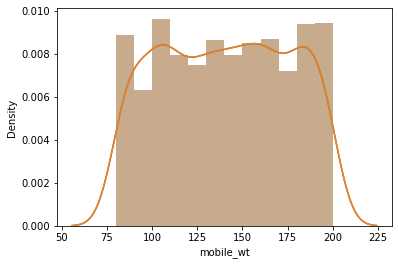

In [40]:
sns.distplot(t_d["mobile_wt"])
sns.distplot(x_train["mobile_wt"])

<AxesSubplot:xlabel='px_height', ylabel='Density'>

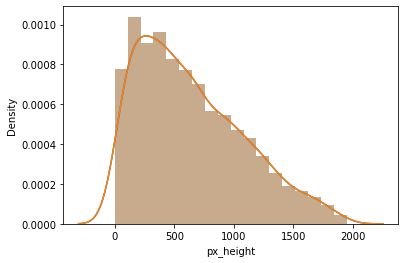

In [41]:
sns.distplot(t_d["px_height"])
sns.distplot(x_train["px_height"])

<AxesSubplot:xlabel='px_width', ylabel='Density'>

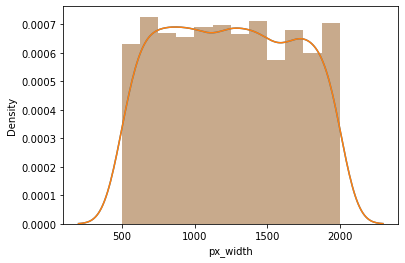

In [42]:

sns.distplot(t_d["px_width"])
sns.distplot(x_train["px_width"])

In [43]:
y_train.reset_index(inplace=True,drop=True)

In [44]:
ros=RandomOverSampler(sampling_strategy={0:500,1:500,2:500,3:500})

In [45]:
x,y=ros.fit_resample(t_d,y_train)

In [46]:
x_train=pd.DataFrame(x)

In [47]:
y_train=pd.DataFrame(y)

### ML Models

##### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [49]:
x_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
578,1195,0,2.0,1,1,1,23,0.1,82,4,9,163,1100,980,13,9,17,1,0,0
864,1296,0,1.4,1,3,0,11,0.2,129,7,4,1222,1382,2552,19,8,10,1,1,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042,1832,2059,5,0,15,1,0,1
1288,1541,1,2.8,1,10,1,28,0.2,165,5,15,796,1052,1108,12,1,7,1,0,1
1407,1617,0,1.5,0,1,1,63,0.7,111,2,10,274,1079,2754,19,10,8,1,1,1


In [50]:
knn=KNeighborsClassifier(n_neighbors=5)
model=knn.fit(x_train,y_train)

In [51]:
x_test.reset_index(inplace=True,drop=True)

In [52]:
x_test[ohe.get_feature_names().tolist()]=pd.DataFrame(ohe.transform(x_test[l]).toarray()).applymap(int)

In [53]:
x_test.drop(l,axis=1,inplace=True)

In [54]:
x_test=si.transform(x_test)

In [55]:
predicted=model.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
knna=accuracy_score(y_test,predicted)

In [65]:
knna

0.9225

##### Navie Bayes

In [58]:
gnb=GaussianNB()

In [59]:
gmodel=gnb.fit(x_train,y_train)

In [60]:
predictedg=gmodel.predict(x_test)

In [61]:
nava=accuracy_score(y_test,predictedg)

In [66]:
nava

0.7875

##### Random Forest

In [62]:
clf_rf = RandomForestClassifier(max_depth=3)
clf_rf = clf_rf.fit(x_train, y_train)
y_pred_rf = clf_rf.predict(x_test)

In [63]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy :  0.79


In [64]:
x_train , x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.15)

clf_rf_entropy = RandomForestClassifier(max_depth=18, criterion="entropy", n_estimators=200,random_state =4)

clf_rf_entropy = clf_rf_entropy.fit(x_train,y_train)
y_pred_rf = clf_rf_entropy.predict(x_test)
Acc1_rf = print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
Acc1_rf

entropy_f1 =  metrics.f1_score(y_test, y_pred_rf,average="macro")

Accuracy: 0.9266666666666666


In [69]:
entropy_f1

0.9255492155406612

In [85]:

acc_sco = {'models': ['knn','navie bayes','Random forest'],
           'Accuracy of models': [0.922500, 0.787500, 0.925549]}

df1 = pd.DataFrame(acc_sco)
df1

,models,Accuracy of models
0,knn,0.922500
1,navie bayes,0.787500
2,Random forest,0.925549
